In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('data.csv', sep=',')

df.head()

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [79]:
df2 = df.copy()

use_mapping = {'CL0': 0,
               'CL1': 0,
               'CL2': 0,
               'CL3': 1,
               'CL4': 1,
               'CL5': 1,
               'CL6': 1}

for j in ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']:
    temp = []
    for i in df[j]:
        temp.append(use_mapping[i])

    df2[j] = temp

df2.head()

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,0,0,0
1,2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,1,0,0,0,0,1,0,1,0,0
2,3,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,0,0
3,4,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,0,0,0,0,0,0
4,5,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,0,0,0,0


In [80]:
ed_mapping = {'Left school before 16 years': 1,
                'Left school at 16 years':2,
                'Left school at 17 years':3,
                'Left school at 18 years':4,
                'Some college or university, no certificate or degree':5,
                'Professional certificate/ diploma':6,
                'University degree':7,
                'Masters degree':8,
                'Doctorate degree':9,}


df2.education = df2.education.map(ed_mapping)

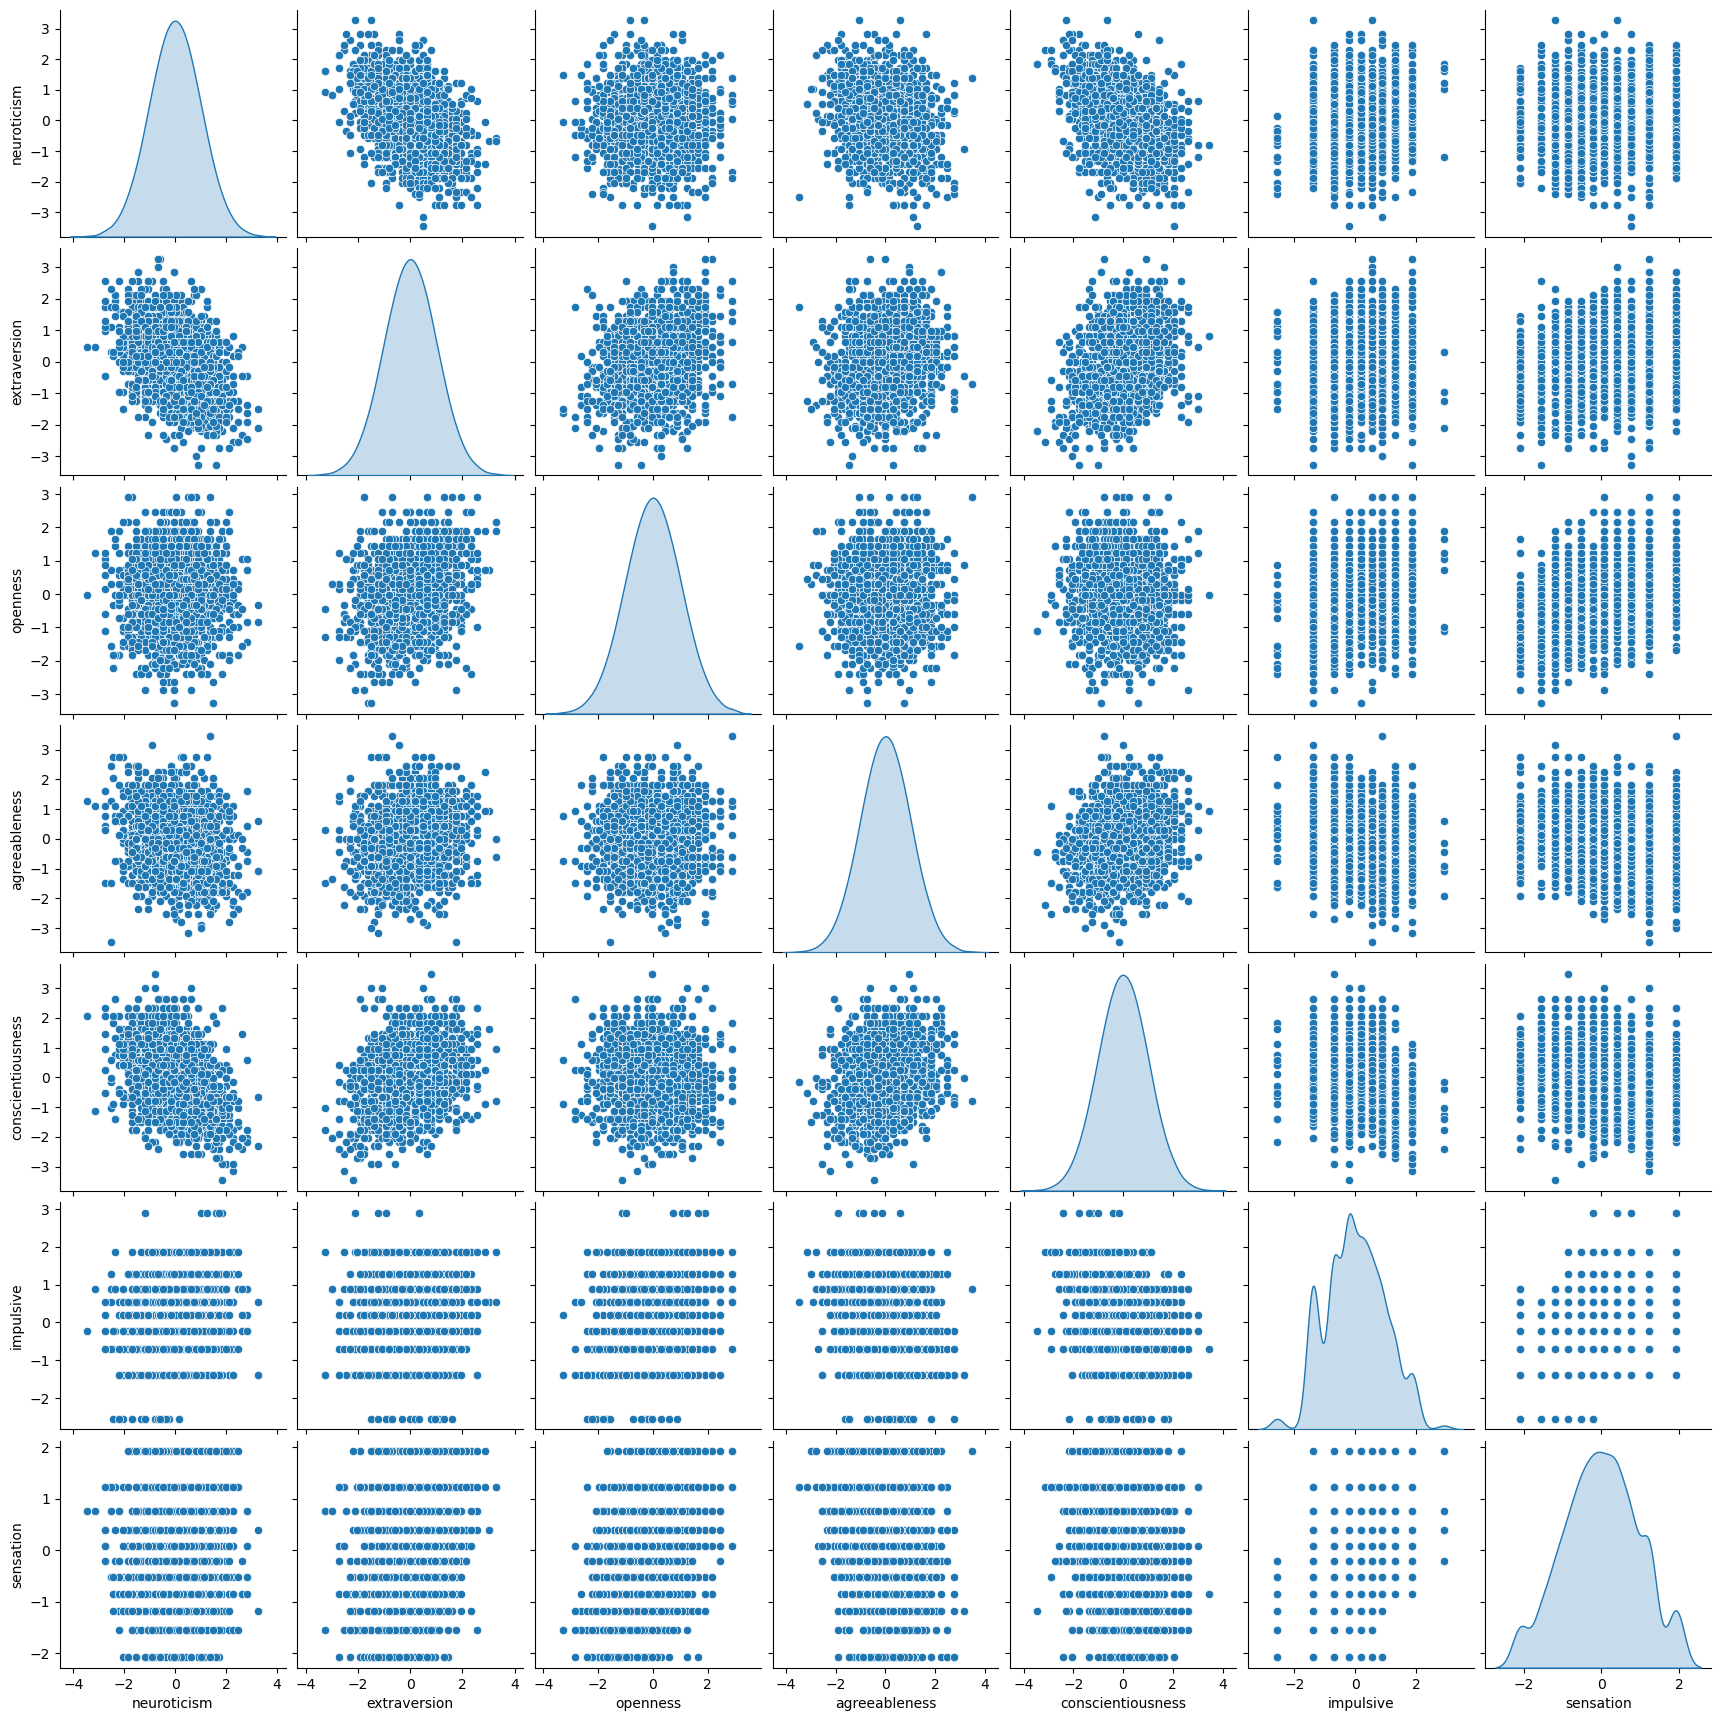

In [81]:
sns.pairplot(data=df2, vars=['neuroticism', 'extraversion', 'openness', 'agreeableness',
       'conscientiousness', 'impulsive', 'sensation'], diag_kind='kde');

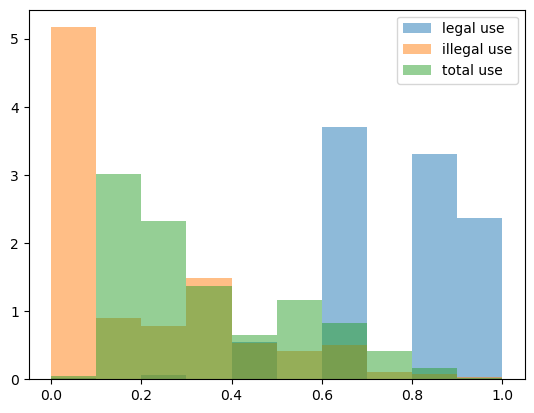

In [104]:
leg = ['Alcohol', 'Caff', 'Choc', 'Legalh',  'Nicotine']
ileg = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',  'LSD', 'Meth', 'Mushrooms', 'VSA']
fic = ['Semer']

pers = ['neuroticism', 'extraversion', 'openness', 'agreeableness', 'conscientiousness', 'impulsive', 'sensation']
n = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0,]
plt.hist(df2[leg].sum(axis=1)/len(leg), label='legal use', alpha=0.5, bins=n, density=True)
plt.hist(df2[ileg].sum(axis=1)/len(ileg), label='illegal use', alpha=0.5, bins=n, density=True)
plt.hist(df2[ileg+leg].sum(axis=1)/len(ileg+leg), label='total use', alpha=0.5, bins=n, density=True);
#plt.hist(df2[fic].sum(axis=1)/len(fic));

plt.legend();

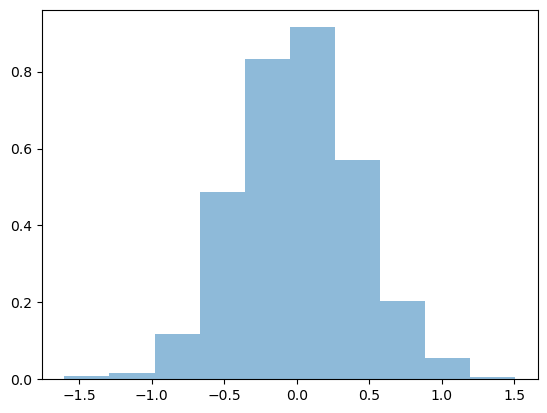

In [105]:
plt.hist(df2[pers].sum(axis=1)/len(pers), alpha=0.5, density=True);

In [106]:
from pprint import pprint

In [107]:
arr = np.array(df2[pers])

pprint(np.cov(arr.T).round(1))

array([[ 1. , -0.4,  0. , -0.2, -0.4,  0.2,  0.1],
       [-0.4,  1. ,  0.2,  0.2,  0.3,  0.1,  0.2],
       [ 0. ,  0.2,  1. ,  0. , -0.1,  0.3,  0.4],
       [-0.2,  0.2,  0. ,  1. ,  0.2, -0.2, -0.2],
       [-0.4,  0.3, -0.1,  0.2,  1. , -0.3, -0.2],
       [ 0.2,  0.1,  0.3, -0.2, -0.3,  0.9,  0.6],
       [ 0.1,  0.2,  0.4, -0.2, -0.2,  0.6,  0.9]])


In [110]:
cor = np.corrcoef(arr.T)

pd.DataFrame(cor.round(2), columns=pers, index=pers)#.to_latex()

,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsive,sensation
neuroticism,1.00,-0.43,0.01,-0.22,-0.39,0.17,0.08
extraversion,-0.43,1.00,0.25,0.16,0.31,0.11,0.21
openness,0.01,0.25,1.00,0.04,-0.06,0.28,0.42
agreeableness,-0.22,0.16,0.04,1.00,0.25,-0.23,-0.21
conscientiousness,-0.39,0.31,-0.06,0.25,1.00,-0.34,-0.23
impulsive,0.17,0.11,0.28,-0.23,-0.34,1.00,0.62
sensation,0.08,0.21,0.42,-0.21,-0.23,0.62,1.00


In [87]:
df2.groupby('Semer').count() #3 people claim to have used a non-existance drug recently

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
Semer,,,,,,,,,,,,,,,,,,,,,
0,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882,...,1882,1882,1882,1882,1882,1882,1882,1882,1882,1882
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [111]:
sdf = df2[df2.Semer==1]
sdf[['age','gender','education'] + pers]

,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsive,sensation
817,18-24,Male,5,-0.67825,1.74091,0.72330,0.13136,0.41594,0.88113,1.92173
1516,18-24,Male,5,-0.24649,-0.80615,-1.27553,-1.34289,-1.92173,-0.71126,0.07987
1533,18-24,Female,5,-0.46725,0.80523,0.29338,2.03972,1.81175,-1.37983,-0.21575


In [112]:
sdf[leg+ileg]

,Alcohol,Caff,Choc,Legalh,Nicotine,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,LSD,Meth,Mushrooms,VSA
817,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
1516,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0
1533,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,0,1,1


In [113]:
for i in leg+ileg:
    temp = [i,df2[i].sum(axis=0)/df2.shape[0]]
    print(f'{i} users: {df2[i].sum(axis=0)/df2.shape[0]:.1%}')

Alcohol users: 92.8%
Caff users: 96.8%
Choc users: 97.6%
Legalh users: 29.9%
Nicotine users: 56.2%
Amphet users: 23.1%
Amyl users: 7.1%
Benzos users: 28.4%
Cannabis users: 53.0%
Coke users: 22.1%
Crack users: 4.2%
Ecstasy users: 27.4%
Heroin users: 6.3%
Ketamine users: 11.0%
LSD users: 20.2%
Meth users: 17.0%
Mushrooms users: 23.0%
VSA users: 5.0%


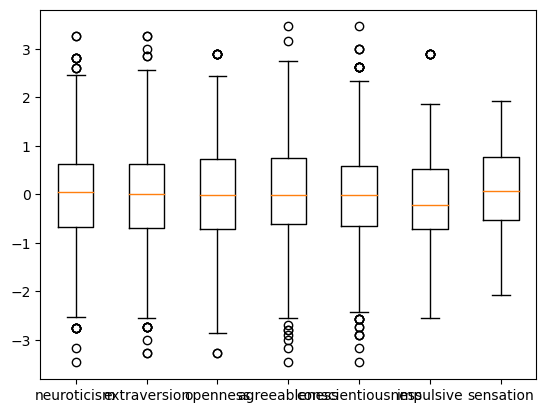

In [114]:
plt.boxplot(df[pers], labels=pers);

In [92]:
df3 = df.copy()

use_mapping = {'CL0': 0,
               'CL1': 1,
               'CL2': 2,
               'CL3': 3,
               'CL4': 4,
               'CL5': 5,
               'CL6': 6}

for j in ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']:
    temp = []
    for i in df[j]:
        temp.append(use_mapping[i])

    df3[j] = temp

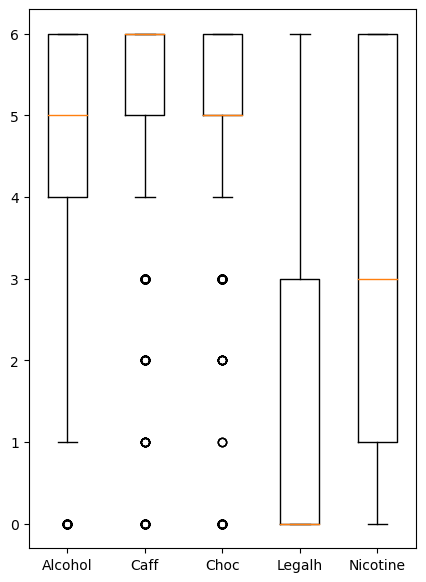

In [93]:
_,ax = plt.subplots(figsize=(5,7))
ax.boxplot(df3[leg], labels=leg);

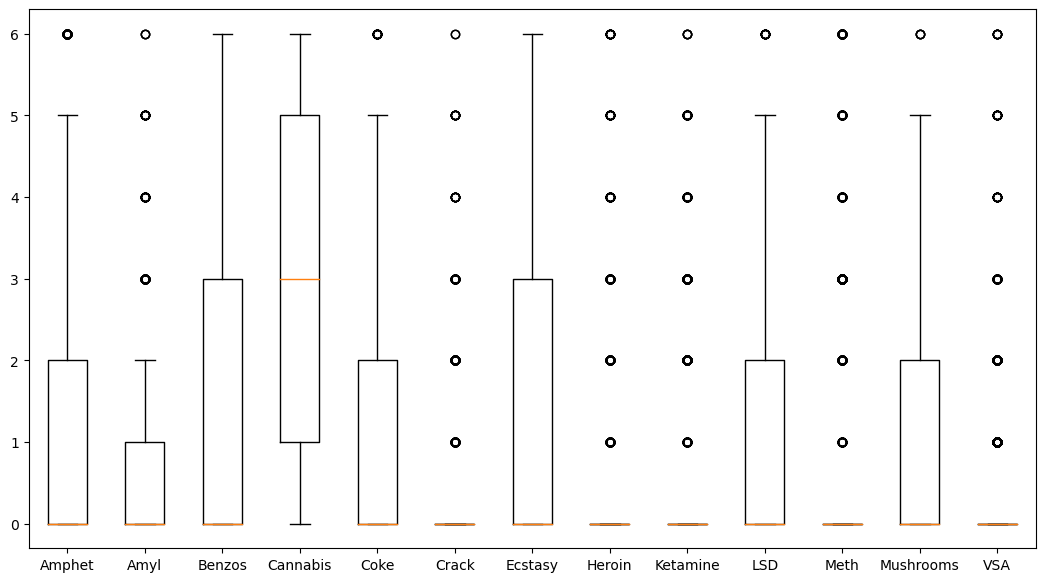

In [94]:
_,ax = plt.subplots(figsize=(13,7))
ax.boxplot(df3[ileg], labels=ileg);

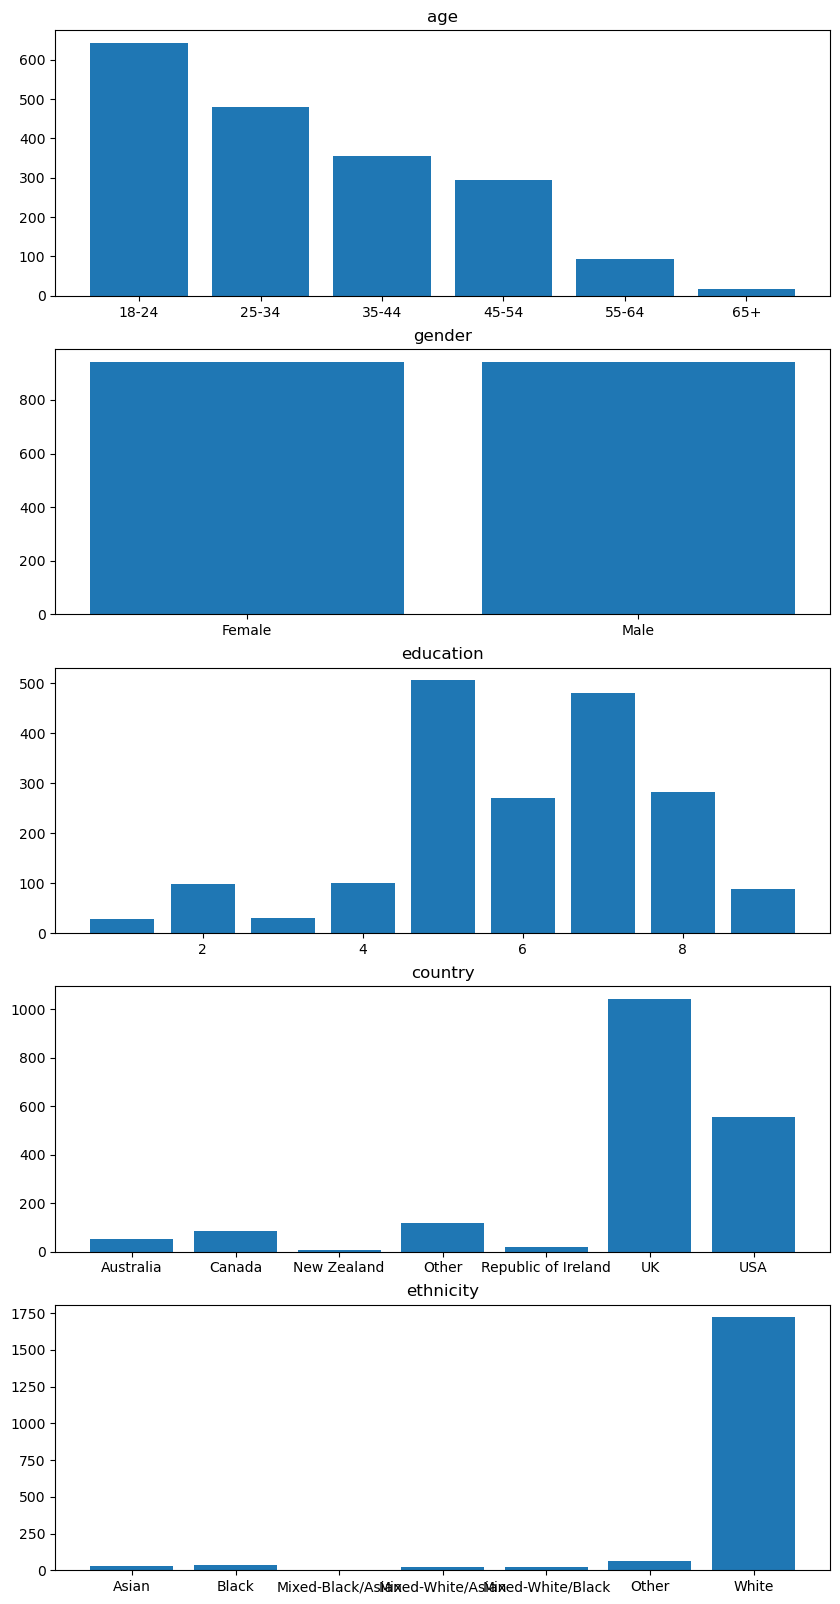

In [95]:
other = ['age', 'gender', 'education', 'country', 'ethnicity']

_, axes = plt.subplots(5,1, figsize=(10,20))

for i in range(5):
    cat = other[i]
    temp = df2.groupby(cat).count()

    axes[i].bar(temp.index, temp.id)
    axes[i].set_title(f'{cat}');

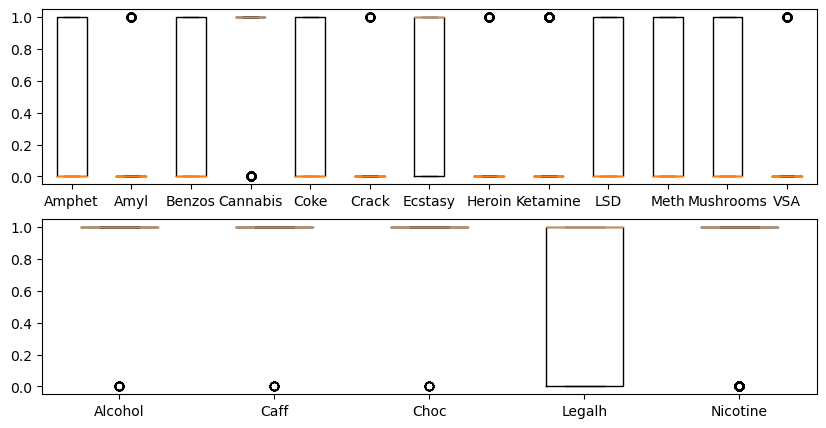

In [96]:
youngs = df2[df2.age=='18-24']

_,ax = plt.subplots(2,1, figsize=(10,5))
ax[0].boxplot(youngs[ileg], labels=ileg)
ax[1].boxplot(youngs[leg], labels=leg);

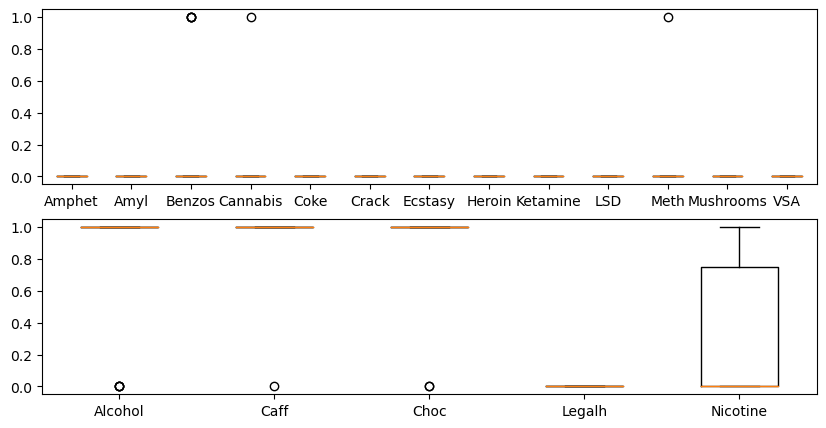

In [97]:
olds = df2[df2.age== '65+']

_,ax = plt.subplots(2,1, figsize=(10,5))
ax[0].boxplot(olds[ileg], labels=ileg)
ax[1].boxplot(olds[leg], labels=leg);

In [102]:
youngs.describe()

,id,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsive,sensation,Alcohol,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,643.000000,643.00000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,...,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,1106.917574,5.40902,0.115121,0.019591,0.316499,-0.093187,-0.263132,0.263969,0.399657,0.958009,...,0.505443,0.108865,0.206843,0.561431,0.426128,0.278383,0.451011,0.755832,0.004666,0.113530
std,425.047431,1.39839,1.031538,1.069582,0.968742,1.002512,1.050750,0.926711,0.857008,0.200724,...,0.500360,0.311712,0.405357,0.496598,0.494898,0.448552,0.497982,0.429927,0.068199,0.317487
min,4.000000,1.00000,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,813.000000,5.00000,-0.580160,-0.750620,-0.317760,-0.760960,-1.014500,-0.217120,-0.215750,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1085.000000,5.00000,0.136060,0.003320,0.293380,-0.154870,-0.405810,0.192680,0.401480,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1410.500000,7.00000,0.825620,0.805230,1.062380,0.590420,0.415940,0.881130,1.224700,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1888.000000,9.00000,2.821960,3.273930,2.901610,3.464360,3.005370,2.901610,1.921730,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


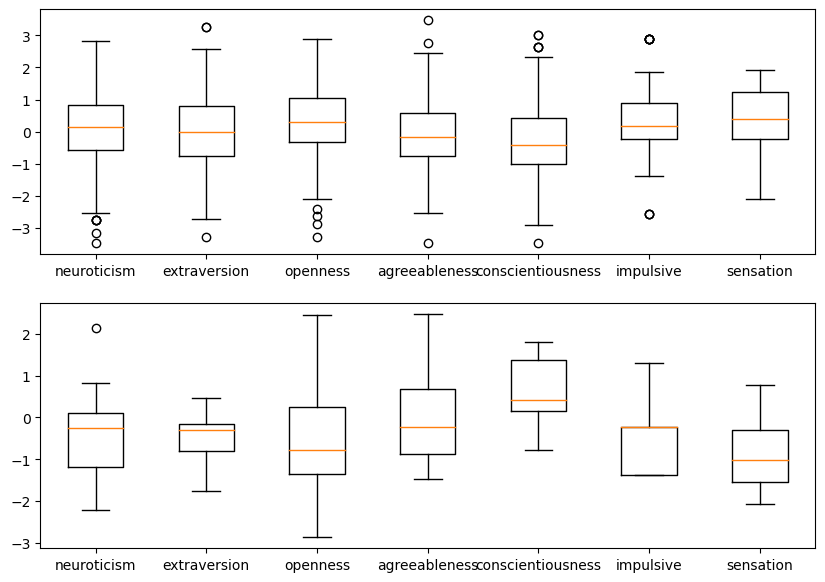

In [121]:
_, axes = plt.subplots(2,1, figsize=(10,7))

axes[0].boxplot(youngs[pers], labels=pers);
axes[1].boxplot(olds[pers], labels=pers);

#There is a difference between the oldest and youngest participants, but this could be an artifact of the survey.

In [103]:
olds.describe()

,id,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsive,sensation,Alcohol,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.0,18.0,18.0,18.0,18.0,18.000000,18.0,18.000000,18.0,18.0
mean,387.833333,4.666667,-0.449389,-0.444660,-0.685602,-0.081007,0.590322,-0.423812,-0.965851,0.777778,...,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.277778,0.0,0.0
std,522.910548,2.869720,1.058718,0.574406,1.300065,1.149881,0.832922,0.823839,0.834249,0.427793,...,0.0,0.0,0.0,0.0,0.0,0.235702,0.0,0.460889,0.0,0.0
min,6.000000,1.000000,-2.218440,-1.762500,-2.859500,-1.479550,-0.781550,-1.379830,-2.078480,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
25%,76.500000,2.000000,-1.194300,-0.806150,-1.347935,-0.877982,0.157365,-1.379830,-1.548580,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
50%,245.500000,5.000000,-0.246490,-0.300330,-0.779810,-0.228295,0.415940,-0.217120,-1.013605,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
75%,335.750000,6.750000,0.112687,-0.154870,0.255392,0.680350,1.379950,-0.217120,-0.293295,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.750000,0.0,0.0
max,1878.000000,9.000000,2.127000,0.476170,2.449040,2.462620,1.811750,1.292210,0.765400,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0
